# Optical Elements as Ophyd Objects

This section is based on the **TES** beamline example.

**Hint**: See the [List of predefined simulations in Sirepo](../simulations.rst) for examples of identifiers for different beamlines.

## Run "Beamline" SRW simulations

In this example, we scan the horizontal size of the aperture and collect the resulting averaged intensities and corresponding 2D intensity distributions from the "Watchpoint" report on the "Beamline" page of Sirepo/SRW app.

Start ``ipython`` and run the following where ``sim_id`` is the UID for the simulation we are working with:



Transient Scan ID: 1     Time: 2021-12-17 14:49:44
Persistent Unique Scan ID: 'ab110f84-ce05-4812-a85d-4ce3065d5df8'


New stream: 'primary'
+-----------+------------+-------------------------+------------+
|   seq_num |       time | aperture_horizontalSize |    w9_mean |
+-----------+------------+-------------------------+------------+
|         1 | 14:50:14.3 |                   0.000 |      0.000 |


|         2 | 14:50:39.8 |                   0.500 | 2510544190625.287 |


|         3 | 14:51:04.4 |                   1.000 | 41560782559219.422 |


|         4 | 14:51:28.9 |                   1.500 | 136793792948293.203 |


|         5 | 14:51:53.5 |                   2.000 | 346875726031568.125 |
+-----------+------------+-------------------------+------------+
generator scan ['ab110f84'] (scan num: 1)





                                 time  \
seq_num                                 
1       2021-12-17 14:50:14.329543829   
2       2021-12-17 14:50:39.880028009   
3       2021-12-17 14:51:04.423809528   
4       2021-12-17 14:51:28.962959290   
5       2021-12-17 14:51:53.515339375   

                                       w9_sirepo_data_json  \
seq_num                                                      
1        {"models": {"arbitraryMagField": {"interpolati...   
2        {"models": {"arbitraryMagField": {"interpolati...   
3        {"models": {"arbitraryMagField": {"interpolati...   
4        {"models": {"arbitraryMagField": {"interpolati...   
5        {"models": {"arbitraryMagField": {"interpolati...   

                                       w9_sirepo_data_hash  w9_duration  \
seq_num                                                                   
1        c6868af2da0b89776ef84184a4f267b32ae39cc3cbb8c2...    29.581812   
2        a1cdae371b8f3f318defb94661e724acebbe940a0ff

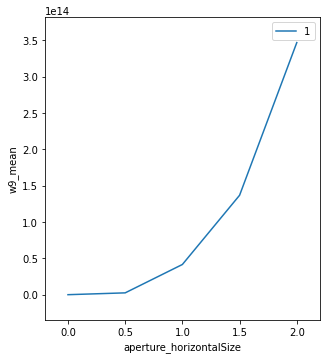

In [1]:
%run -i ../../../examples/prepare_det_env.py

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("srw", "00000002")
classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)

aperture.horizontalSize.kind = "hinted"

(uid,) = RE(bp.scan([w9], aperture.horizontalSize, 0, 2, 5))

hdr = db[uid]
tbl = hdr.table(fill=True)
print(tbl)

w9_image = np.array(list(hdr.data("w9_image")))

Data shape: (5, 42, 960)


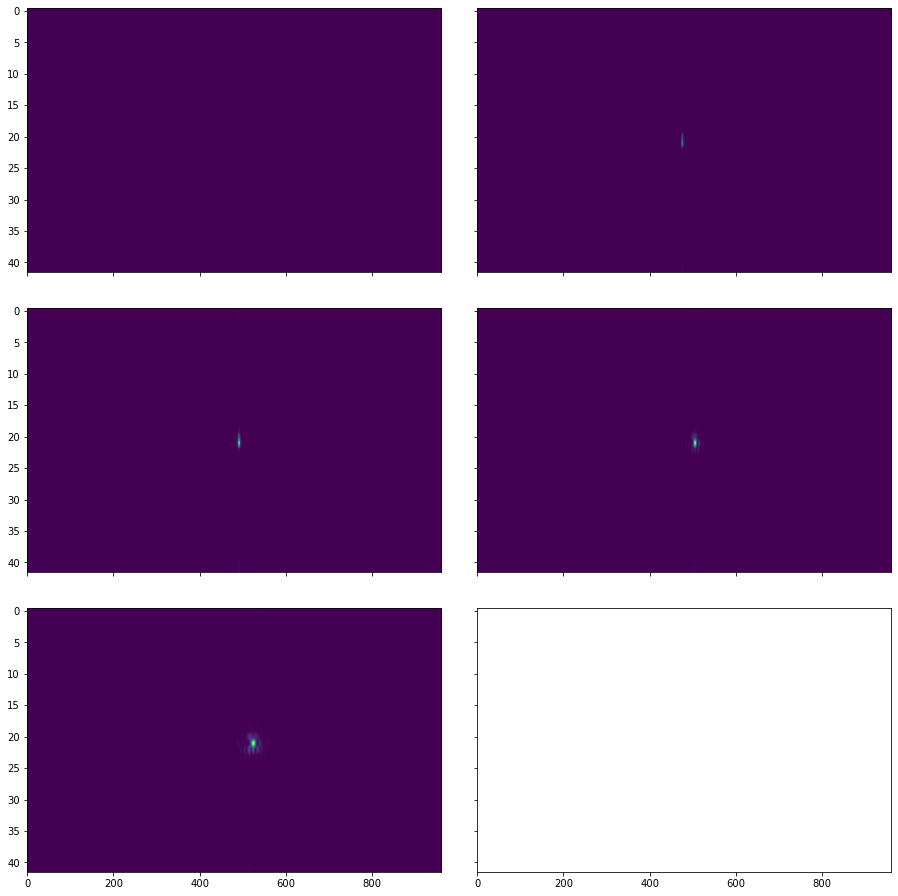

In [2]:
from mpl_toolkits.axes_grid1 import ImageGrid

print(f"Data shape: {w9_image.shape}")
num_frames = w9_image.shape[0]
ncols = 2
nrows = int(np.ceil(num_frames / ncols))

fig = plt.figure()
grid = ImageGrid(fig, (1, 2, ncols, nrows),
                 nrows_ncols=(nrows, ncols),
                 axes_pad=0.5,
                 aspect=False)

for ax, im in zip(grid, w9_image[:, ...]):
    ax.imshow(im, aspect="auto")

## Run "Beam Statistics" Sirepo/Shadow app simulations

In this example, we scan the toroidal mirror's radius and collect the results of the "Beam Statistics" report on the "Beamline" page of Sirepo/Shadow app. At the end of the execution, we provide the timing report for these simulations.

In [3]:
%run -i ../../../examples/prepare_det_env.py

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import BeamStatisticsReport, create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("shadow", "00000002")

classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)

bsr = BeamStatisticsReport(name="bsr", connection=connection)

toroid.r_maj.kind = "hinted"

scan_range = (10_000, 50_000, 21)

(uid,) = RE(bp.scan([bsr], toroid.r_maj, *scan_range))

hdr = db[uid]
tbl = hdr.table()
print(tbl)

data = np.array(tbl["time"].diff(), dtype=float)[1:] / 1e9



Transient Scan ID: 1     Time: 2021-12-17 14:51:55
Persistent Unique Scan ID: 'b0a2dac9-59a3-46a5-be39-a83193d3db8a'


New stream: 'primary'
+-----------+------------+--------------+
|   seq_num |       time | toroid_r_maj |
+-----------+------------+--------------+
|         1 | 14:52:00.6 |    10000.000 |


|         2 | 14:52:04.7 |    12000.000 |


|         3 | 14:52:08.9 |    14000.000 |


|         4 | 14:52:13.0 |    16000.000 |


|         5 | 14:52:17.2 |    18000.000 |


|         6 | 14:52:21.4 |    20000.000 |


|         7 | 14:52:25.5 |    22000.000 |


|         8 | 14:52:29.6 |    24000.000 |


|         9 | 14:52:33.8 |    26000.000 |


|        10 | 14:52:37.9 |    28000.000 |


|        11 | 14:52:42.1 |    30000.000 |


|        12 | 14:52:46.2 |    32000.000 |


|        13 | 14:52:50.4 |    34000.000 |


|        14 | 14:52:54.5 |    36000.000 |


|        15 | 14:52:58.7 |    38000.000 |


|        16 | 14:53:02.9 |    40000.000 |


|        17 | 14:53:07.0 |    42000.000 |


|        18 | 14:53:11.2 |    44000.000 |


|        19 | 14:53:15.4 |    46000.000 |


|        20 | 14:53:19.5 |    48000.000 |


|        21 | 14:53:23.7 |    50000.000 |
+-----------+------------+--------------+
generator scan ['b0a2dac9'] (scan num: 1)





                                 time  toroid_r_maj  \
seq_num                                               
1       2021-12-17 14:52:00.611912966       10000.0   
2       2021-12-17 14:52:04.779629230       12000.0   
3       2021-12-17 14:52:08.945616245       14000.0   
4       2021-12-17 14:52:13.096148968       16000.0   
5       2021-12-17 14:52:17.253958941       18000.0   
6       2021-12-17 14:52:21.406032085       20000.0   
7       2021-12-17 14:52:25.548077106       22000.0   
8       2021-12-17 14:52:29.697366714       24000.0   
9       2021-12-17 14:52:33.847840309       26000.0   
10      2021-12-17 14:52:37.988630295       28000.0   
11      2021-12-17 14:52:42.142304659       30000.0   
12      2021-12-17 14:52:46.279694557       32000.0   
13      2021-12-17 14:52:50.438649178       34000.0   
14      2021-12-17 14:52:54.596280098       36000.0   
15      2021-12-17 14:52:58.745962143       38000.0   
16      2021-12-17 14:53:02.905511618       40000.0   
17      20

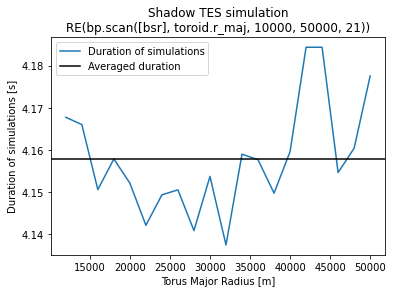

In [4]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.linspace(*scan_range)[1:], data, label="Duration of simulations")
ax.set_ylabel("Duration of simulations [s]")
ax.set_xlabel("Torus Major Radius [m]")
ax.axhline(data.mean(), color="k", label="Averaged duration")
ax.legend()
title = (
    f"Shadow TES simulation\n"
    f"RE(bp.scan([bsr], toroid.r_maj, "
    f"{', '.join([str(x) for x in scan_range])}))"
)
ax.set_title(title)
plt.show()